# Imports

In [2]:
import dictdiffer
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import pathlib
import pprint
import seaborn as sns
import scipy.special as sp
import sys

from typing import *
from google.protobuf.json_format import MessageToDict

# (disable?) label latex support for matplotlib
plt.rcParams['text.usetex'] = False

# import protobuf module.
a_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'python_generated'))
sys.path.insert(0, a_path)
import message_pb2 as pb

/opt/homebrew/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.29.3 is exactly one major version older than the runtime version 6.31.0 at message.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(


# Load data

In [27]:
CSV_FILES = [
  '../../data/no-drug-power-law-phase-transition/N50/derived/hamming-distances-1749518999076.csv',
  '../../data/no-drug-power-law-phase-transition/N500/derived/hamming-distances-1749519070705.csv',
  '../../data/no-drug-power-law-phase-transition/N5000/derived/hamming-distances-1749519077551.csv',
  '../../data/no-drug-power-law-phase-transition/N50000/derived/hamming-distances-1749519084553.csv',
]

steady_state_hamming_distance_50_df = pd.read_csv(CSV_FILES[0])
steady_state_hamming_distance_50_df['N'] = 50

steady_state_hamming_distance_500_df = pd.read_csv(CSV_FILES[1])
steady_state_hamming_distance_500_df['N'] = 500
steady_state_hamming_distance_5000_df = pd.read_csv(CSV_FILES[2])
steady_state_hamming_distance_5000_df['N'] = 5000
steady_state_hamming_distance_50000_df = pd.read_csv(CSV_FILES[3])
steady_state_hamming_distance_50000_df['N'] = 50000
steady_state_hamming_distance_df = pd.concat([
    steady_state_hamming_distance_50_df,
    steady_state_hamming_distance_500_df,
    steady_state_hamming_distance_5000_df,
    steady_state_hamming_distance_50000_df
])
steady_state_hamming_distance_df

,expected_connectivity,gamma,hamming_distance,N
0,4.5,1.633541,0.00000,50
1,4.5,1.633541,0.23400,50
2,4.5,1.633541,0.00000,50
3,4.5,1.633541,0.00000,50
4,4.5,1.633541,0.00000,50
...,...,...,...,...
65245,11.0,1.907693,0.09232,50000
65246,11.0,1.907693,0.09484,50000
65247,11.0,1.907693,0.13162,50000
65248,11.0,1.907693,0.09858,50000


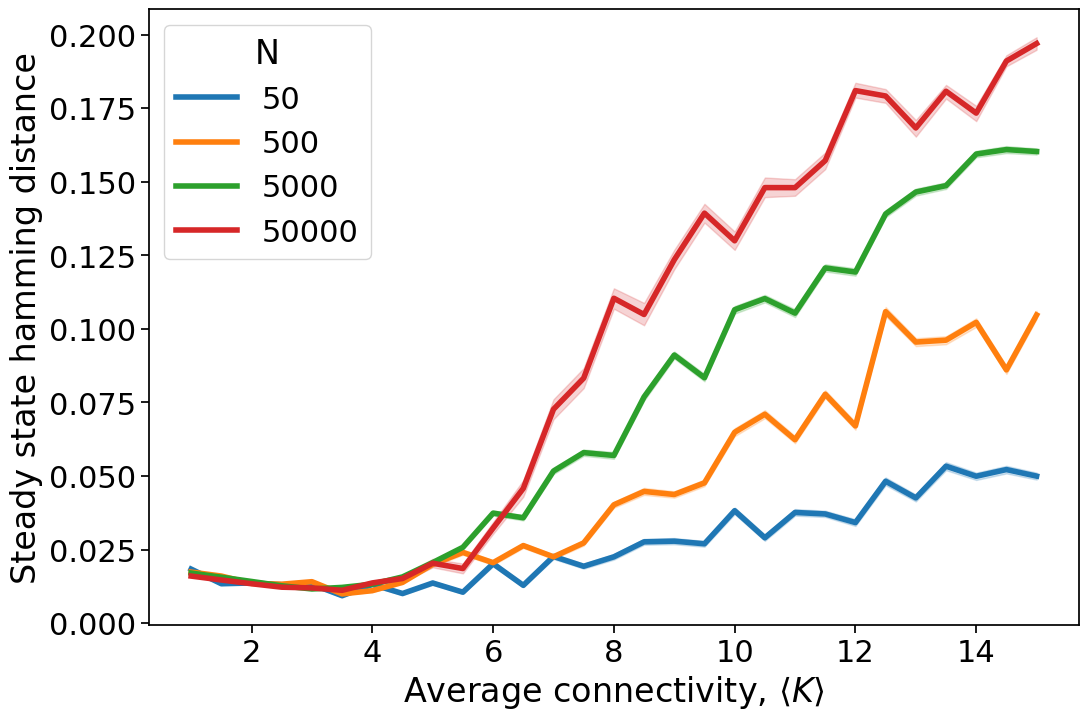

In [40]:
with sns.plotting_context('notebook', font_scale=2.0):
  fig, ax = plt.subplots(figsize=(12, 8))
  g = sns.lineplot(
    data=steady_state_hamming_distance_df,
    x='expected_connectivity',
    y='hamming_distance',
    legend=True,
    hue='N',
    lw=4,
    palette='tab10',
    ax=ax,
  )
  g.set(xlabel='Average connectivity, $\\langle K \\rangle$', ylabel='Steady state hamming distance')

In [41]:
g.figure.savefig(
  '../../plots/no-drug-power-law-phase-transition-K.png',
  bbox_inches='tight',
  dpi=300,
)

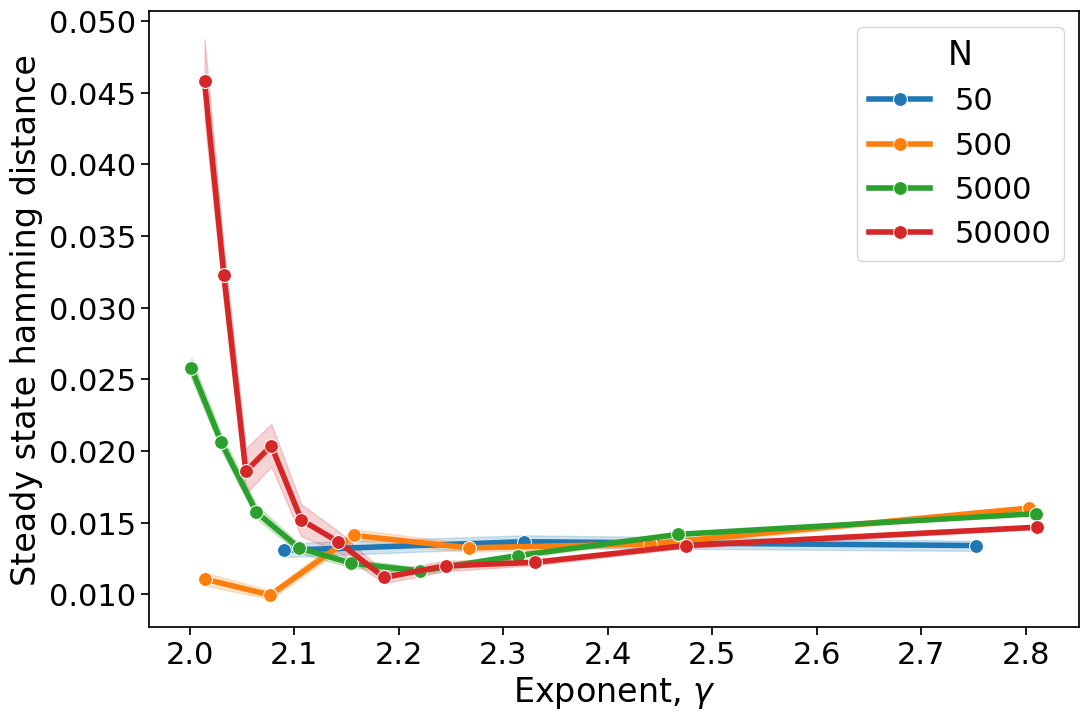

In [42]:
with sns.plotting_context('notebook', font_scale=2.0):
  fig, ax = plt.subplots(figsize=(12, 8))
  h = sns.lineplot(
    data=steady_state_hamming_distance_df[
      (2 <= steady_state_hamming_distance_df['gamma']) & (steady_state_hamming_distance_df['gamma'] <= 3.5)
    ],
    x='gamma',
    y='hamming_distance',
    legend=True,
    hue='N',
    lw=4,
    palette='tab10',
    marker='o',
    markersize=10,
    ax=ax,
  )
  h.set(xlabel='Exponent, $\\gamma$', ylabel='Steady state hamming distance')

In [43]:
h.figure.savefig(
  '../../plots/no-drug-power-law-phase-transition-gamma.png',
  bbox_inches='tight',
  dpi=300,
)